In [1]:
import requests

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns


In [2]:
mural_url = 'https://data.cityofchicago.org/resource/we8h-apcf.json'
response = requests.get(mural_url)
mural_df = pd.DataFrame(response.json())

In [3]:
mural_df.head()

,mural_registration_id,artist_credit,artwork_title,media,year_installed,location_description,street_address,zip,ward,affiliated_or_commissioning,...,community_areas,latitude,longitude,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,year_restored
0,19001,Kerry James Marshall,Rush More,Painting,2017,"Chicago Cultural Center, West FaÃ§ade",78 E Washington St,60602,42,DCASE,...,38,41.88333428,-87.62505014,"{'type': 'Point', 'coordinates': [-87.62505014...",41,38,14310,580,36,NaN
1,19043,"Rahmaan Statik, Max Sansing",Sepia,Paint,2016,NaN,2230 S Central Park Ave,60623,22,Chicago Public Art Group,...,NaN,41.850922,-87.715009,"{'type': 'Point', 'coordinates': [-87.715009, ...",57,32,21569,754,28,NaN
2,19139,Hector Duarte,Honor Boricua,NaN,1993,NaN,2601 W Evergreen Ave,60622,26,Chicago Public Art Group,...,25,41.90560086,-87.69214278,"{'type': 'Point', 'coordinates': [-87.69214278...",4,25,21560,543,49,NaN
3,19135,Mirtes Zwierzynski,Garfield Park Conservatory Alliance Mosaic,NaN,2007,N Hamlin Ave and Lake St,N Hamlin Ave and Lake St,60624,28,Chicago Public Art Group,...,NaN,41.885114,-87.721068,"{'type': 'Point', 'coordinates': [-87.721068, ...",30,27,21572,658,23,NaN
4,19148,Ed Paschke,"Luna Negra, 1998",Paint,2014,Outside left wall of building,5415 W Higgins Ave,60630,45,Ed Paschke Art Center,...,11,41.96872306,-87.76207536,"{'type': 'Point', 'coordinates': [-87.76207536...",48,11,21869,129,50,NaN


In [4]:
print(f"Currently, there are {mural_df.shape[0]} murals registered in Chicago")

Currently, there are 447 murals registered in Chicago


# Which Zip Codes have the most murals in Chicago


In [5]:
mural_df.groupby('zip').count()["mural_registration_id"].sort_values(ascending=False)

zip
60640         51
60622         44
60605         41
60642         33
60623         25
60608         24
60626         20
60657         18
60613         13
60647         13
60641         13
60618         12
60601         11
60637         11
60660          9
60617          7
60653          7
60609          7
60614          6
60649          5
60615          5
60603          5
60612          5
60636          5
60625          5
60630          5
60607          4
60616          4
60602          3
60651          3
60624          3
60611          3
60621          3
60610          3
60646          2
60628          2
60634          2
60632          2
60639          1
60643          1
60644          1
60645          1
60638          1
60629          1
60652          1
60620          1
60654          1
60656          1
60619          1
60608-1204     1
60699          1
Name: mural_registration_id, dtype: int64

# Which murals are closest to the California Blue Line in Logan Square

In [6]:
mural_df["california_blue_lat"] = 41.921939 
mural_df["california_blue_long"] = -87.69689

In [7]:
mural_df["latitude"] = mural_df["latitude"].astype(float)
mural_df["longitude"] = mural_df["longitude"].astype(float)

In [8]:
def haversine(lat1, lon1, lat2, lon2, to_radians=True, earth_radius=6371):
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])
    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2
    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [9]:
mural_df['dist_to_cali_blue'] = haversine(
    mural_df["latitude"],mural_df['longitude'], 
    mural_df["california_blue_lat"], mural_df["california_blue_long"]
)

In [10]:
mural_df.sort_values(by="dist_to_cali_blue").head(10)

,mural_registration_id,artist_credit,artwork_title,media,year_installed,location_description,street_address,zip,ward,affiliated_or_commissioning,...,location,:@computed_region_rpca_8um6,:@computed_region_vrxf_vc4k,:@computed_region_6mkv_f3dw,:@computed_region_bdys_3d7i,:@computed_region_43wa_7qmu,year_restored,california_blue_lat,california_blue_long,dist_to_cali_blue
267,19324,Justus Roe,Coles,Acrylic and exterior latex paint,2018,Entanceof Cole's bar 2338 n. Milwaukee,2338 N Milwaukee Ave,60647,1,NaN,...,"{'type': 'Point', 'coordinates': [-87.69871397...",1,23,22535,322,41,2019,41.921939,-87.69689,0.238257
25,19006,John Pitman Weber,TILT (Together Protect the Community),NaN,1976,NaN,2654 W Fullerton,60647,1,Chicago Public Art Group,...,"{'type': 'Point', 'coordinates': [-87.69467615...",1,23,22535,468,41,2005,41.921939,-87.69689,0.381020
140,19138,"Cathy Cajandig, John Weber",Children are our Future,Paint and Mixed Media,1979,The 606 at California and Bloomingdale,1760 N California Ave,60647,26,Chicago Public Art Group,...,"{'type': 'Point', 'coordinates': [-87.69723595...",1,25,22535,300,41,2015,41.921939,-87.69689,0.911374
54,19111,Sam Kirk and Sandra Antongiorgi,I Am Logan Square,Paint,2017,Kedzie Ave and Milwaukee Ave,2639 N Milwaukee Ave,60647,35,DCASE,...,"{'type': 'Point', 'coordinates': [-87.70837014...",1,23,22535,72,12,NaN,41.921939,-87.69689,1.290666
212,19376,Emmy Star Brown,Bend,Paint,2021,Wall in the Parking Lot of the Kimball Art Center,1757 N Kimball Ave,60647,26,JoHalla Projects,...,"{'type': 'Point', 'coordinates': [-87.71164696...",1,24,22535,390,49,NaN,41.921939,-87.69689,1.541854
279,19131,Jeffery Cook and Phil Schuster,Calling Forth the Spirit of Peace,NaN,1993,W North Ave & N Kedzie Ave,3200 West North Ave,60647,26,Chicago Public Art Group,...,"{'type': 'Point', 'coordinates': [-87.70703651...",1,24,22535,390,49,NaN,41.921939,-87.69689,1.549726
191,19003,John Pitman Weber,Rompiendo Las Cadenas/Breaking the Chains,NaN,1971,NaN,1458 N Rockwell St,60622,1,Chicago Public Art Group,...,"{'type': 'Point', 'coordinates': [-87.69222102...",4,25,21560,288,41,NaN,41.921939,-87.69689,1.559734
151,19330,Justus Roe,Logan,Acrylic and exterior latex paint,2019,Garage,2827 N Spaulding Ave,60618,35,NaN,...,"{'type': 'Point', 'coordinates': [-87.70973589...",39,22,21538,55,12,NaN,41.921939,-87.69689,1.612757
95,19397,Christoper Balboa Jr,N/A,Paint,2021,"Chicago Flag, East andd South face of the east...",2125 W. Diversey Ave,60647,1,NaN,...,"{'type': 'Point', 'coordinates': [-87.68155661...",1,68,22535,743,41,NaN,41.921939,-87.69689,1.701367
287,19227,Chad Kouri,MAKE,Paint,2011,NaN,1549 N Bell Ave,60622,1,NaN,...,"{'type': 'Point', 'coordinates': [-87.68340625...",4,25,21560,516,41,NaN,41.921939,-87.69689,1.733794


# Did the number of murals installed per year trend up or down?

In [11]:
murals_by_year = mural_df.groupby("year_installed").count()["mural_registration_id"]
murals_by_year.tail(15)

year_installed
2009     5
2010     2
2011     9
2012     7
2013    15
2014    16
2015    20
2016    41
2017    75
2018    41
2019    72
2020    35
2021    25
2022    23
2023     4
Name: mural_registration_id, dtype: int64

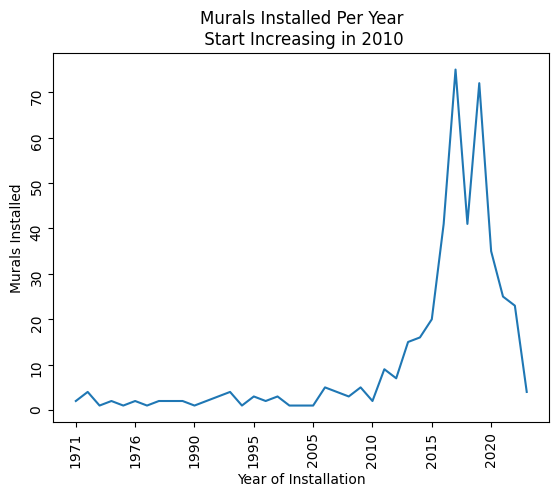

In [12]:
fig, ax = plt.subplots()

sns.lineplot(x=murals_by_year.index, y=murals_by_year, ax=ax)

ax.set_title("Murals Installed Per Year\n Start Increasing in 2010")
ax.set_xlabel("Year of Installation")
ax.set_ylabel("Murals Installed")
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=5))

plt.tick_params(rotation=90)